In [1]:
import pandas as pd

C:\Users\SHRAVANI\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
df=pd.read_csv("Homes for Sale and Real Estate.csv")

In [10]:
df.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles


In [11]:
df.describe()

,Price,Beds,Bath,Sq.Ft
count,3.360000e+03,3360.000000,3360.000000,3360.000000
mean,7.500648e+05,3.125000,2.479167,1558.815179
std,6.447619e+05,1.349087,1.023546,1056.424307
min,1.419000e+05,1.000000,1.000000,307.000000
25%,3.990000e+05,2.000000,2.000000,933.000000
50%,6.199000e+05,3.000000,2.500000,1352.000000
75%,8.499220e+05,4.000000,3.500000,2023.250000
max,1.000000e+07,10.000000,8.000000,39654.000000


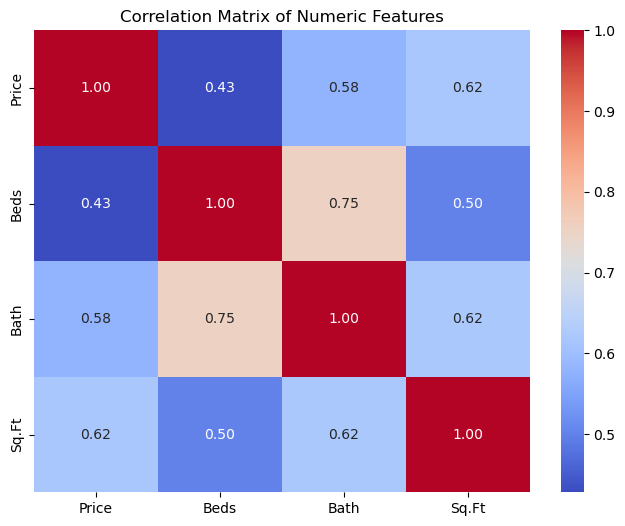

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr_matrix = df[['Price', 'Beds', 'Bath', 'Sq.Ft']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()


#### Association between variables
- Feature Pair	Correlation	Interpretation
- Price & Sq.Ft	High (+)	Larger homes are more expensive — expected and logical.
- Beds & Sq.Ft	Moderate (+)	More bedrooms → usually larger home area.
- Beds & Price	Weak (+)	More bedrooms don't always mean higher price — depends on other features.
- Bath & Sq.Ft	Moderate (+)	More bathrooms are more common in larger homes.


C:\Users\SHRAVANI\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHRAVANI\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHRAVANI\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SHRAVANI\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

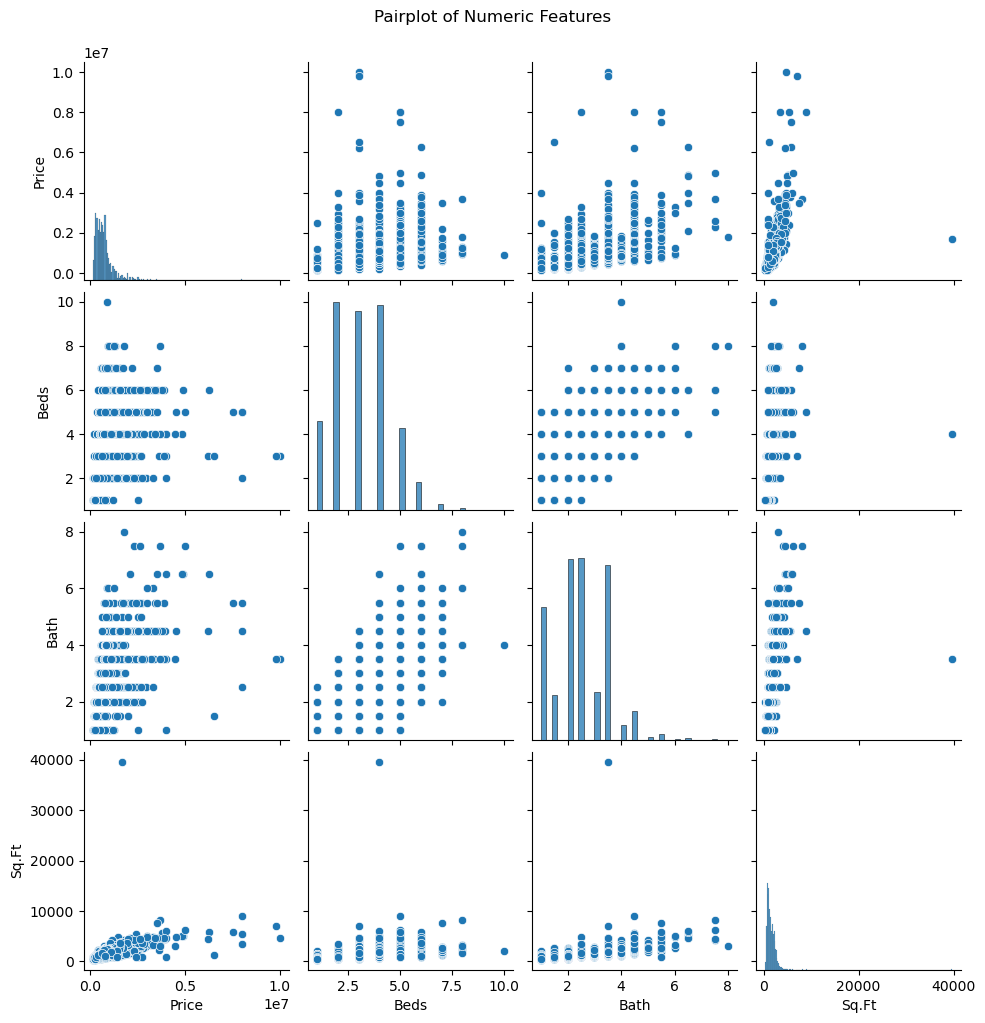

In [16]:
# Pairplot of numeric features
sns.pairplot(df[['Price', 'Beds', 'Bath', 'Sq.Ft']])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()


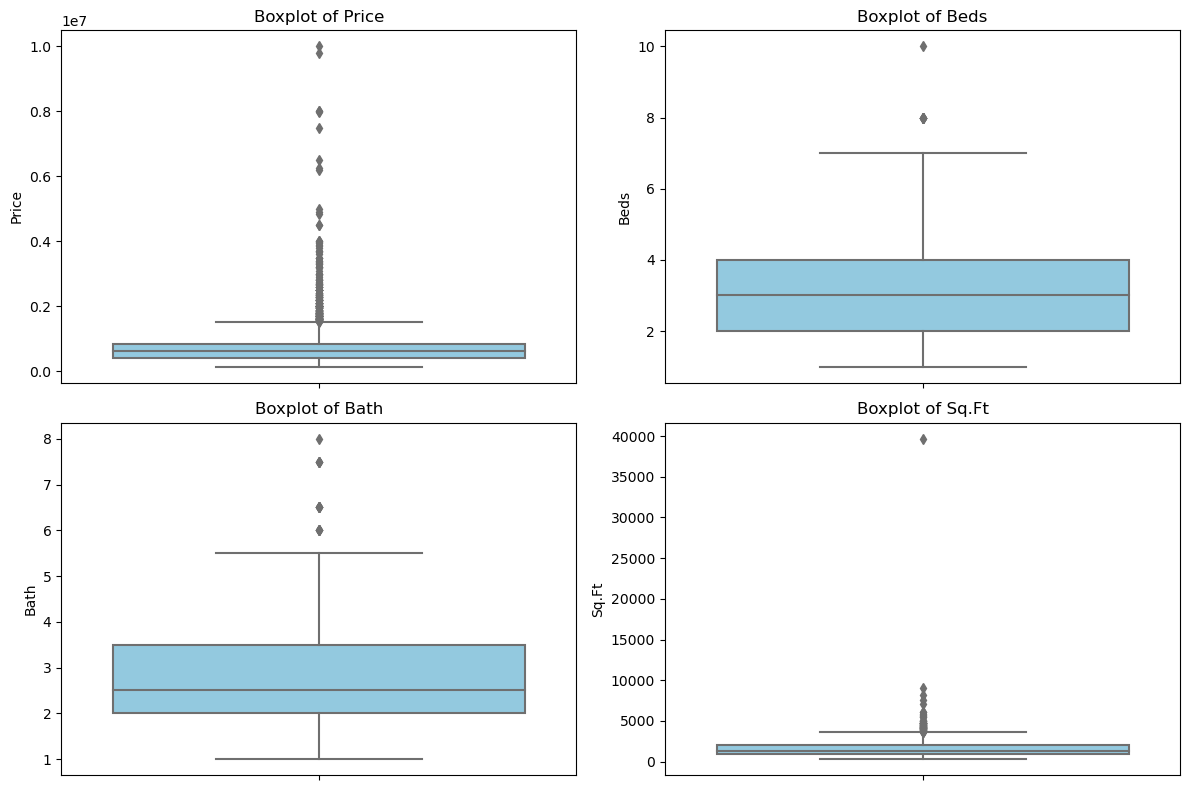

In [18]:

# Select only numeric columns
numeric_features = ['Price', 'Beds', 'Bath', 'Sq.Ft']

# Create individual boxplots for each feature
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()


##### Outliers are clearly visible in:

- Price: luxury homes with very high prices.

- Sq.Ft: large properties are far from the median.

- Slight outliers also exist in Beds and Bath but are less extreme.

- Price and Sq.Ft are right-skewed — a few properties are much larger and more expensive.


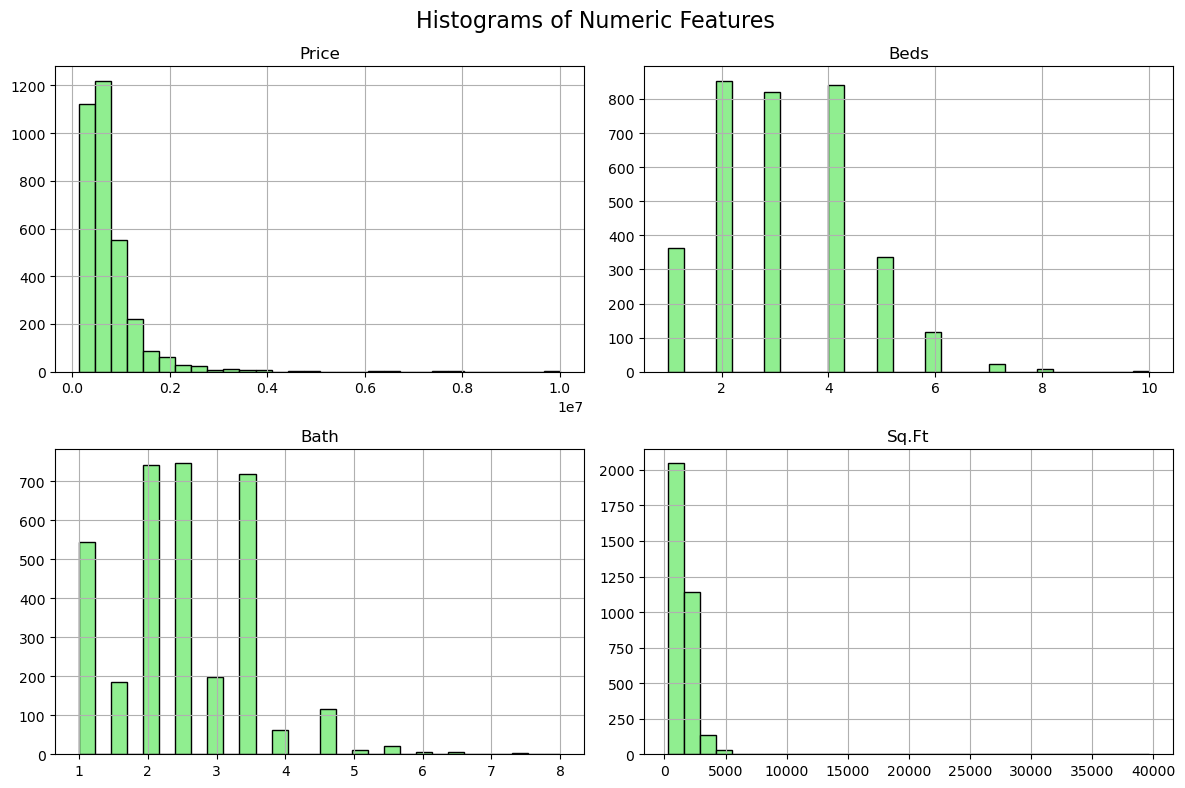

In [21]:
import matplotlib.pyplot as plt

# List of numeric features
numeric_features = ['Price', 'Beds', 'Bath', 'Sq.Ft']

# Create histograms
df[numeric_features].hist(bins=30, figsize=(12, 8), color='lightgreen', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


- Beds and Bath show discrete counts (as expected) with most homes having 2–4 beds and 1.5–3 baths.

### Trends identified
- Pricing varies significantly; consider removing or isolating luxury homes if analyzing affordability or pricing trends.
- Most homes have 2–4 bedrooms. Very few have more than 5 or less than 1.
- Majority of listings are standard family-sized homes (ideal for couples or small families).
- Similar to beds — clustered around 2–3 bathrooms. High bath-to-bed ratio may indicate premium/luxury homes.
- Useful feature to group homes into "compact", "standard", and "luxury" segments.